<a href="https://colab.research.google.com/github/S-kushwaha01/customer-churn-prediction/blob/main/churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initial Data Loading and Inspection

In [2]:
import pandas as pd
import numpy as np

# 1.Load the Telco Customer Churn dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
# 2.View first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# 3.Check dataset shape (rows, columns)
df.shape

(7043, 21)

In [5]:
# 4.View column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# 5.Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# 6.Check for missing values in each column
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
# 7.Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# 8.Check target variable distribution
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


In [10]:
# 9.Target variable percentage distribution
df["Churn"].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.463013
Yes,26.536987


Initial Observations:
 - Dataset has 7043 rows and 21 columns
- Contains both numerical and categorical features
 - Target variable 'Churn' is imbalanced
 - No major missing values at first glance
 - Data requires preprocessing before modeling

#Exploratory Data Analysis (EDA)

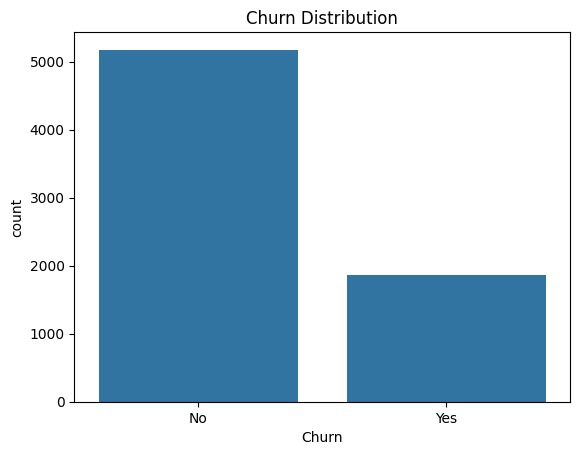

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Target Variable Analysis (Churn Distribution)

# Plot churn distribution
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

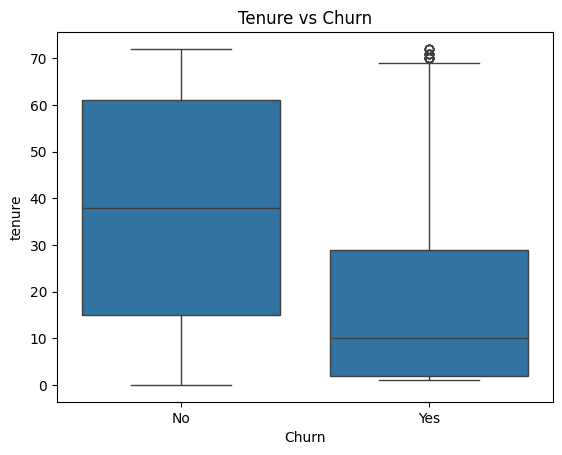

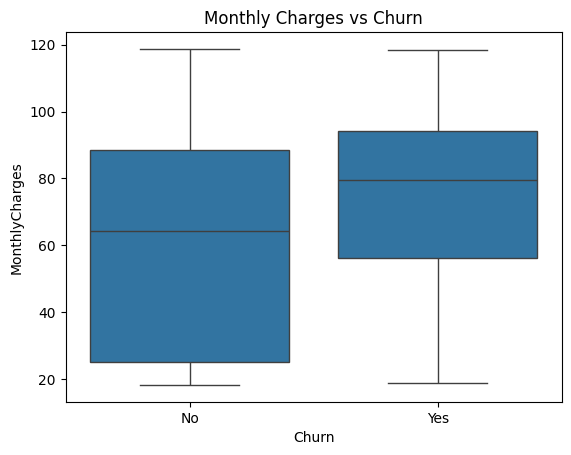

In [12]:
# 2.Numerical Feature Analysis

# Tenure vs Churn
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

# Monthly Charges vs Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

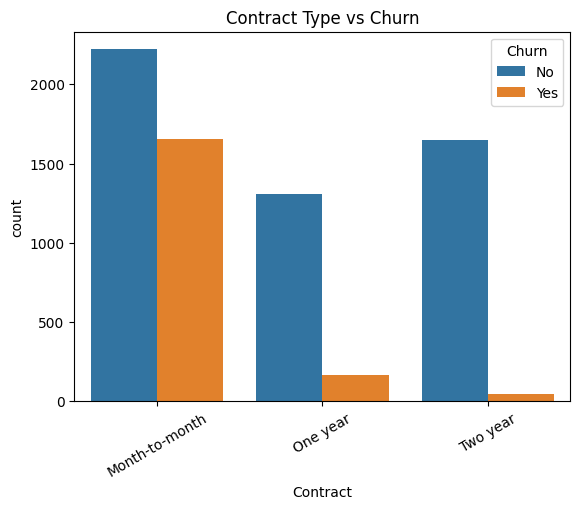

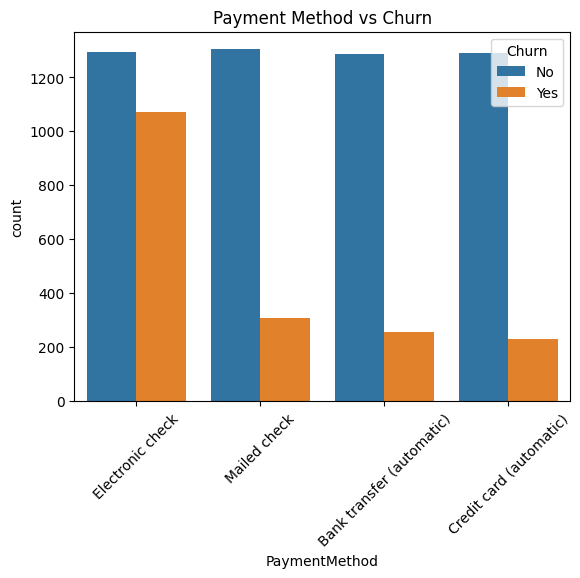

In [13]:
# 3.Categorical Feature Analysis

# Contract Type vs Churn
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=30)
plt.show()

# Payment Method vs Churn
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()

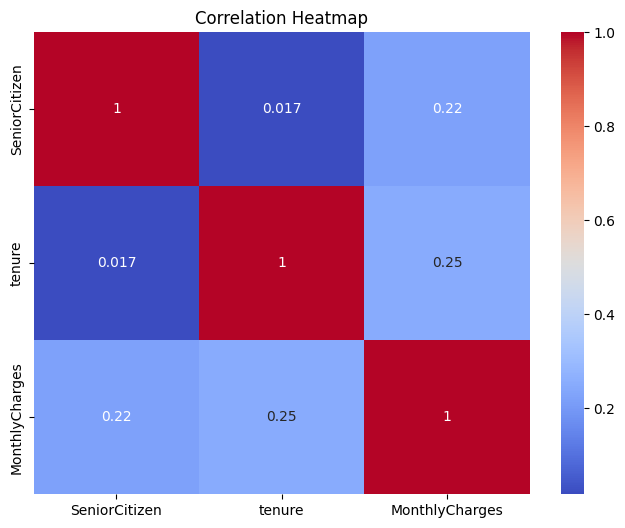

In [14]:
# 4.Correlation Analysis (Numerical Features Only)

# Select numerical columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Correlation matrix
corr = numeric_df.corr()

# Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

EDA Summary (Key Observations)

 - Dataset is imbalanced (more non-churn customers)
 - Customers with low tenure are more likely to churn
 - Higher monthly charges increase churn risk
 - Month-to-month contracts have highest churn
 - Electronic check payment method shows higher churn
 - Tenure and TotalCharges are strongly correlated

#Data Preprocessing & Feature Engineering

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 3.Handle Missing Values

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values with median
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [30]:
# 4.Encode Target Variable (Churn)

# Convert target variable to numerical
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0}).astype(int)

print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [17]:
# 5.Encode Categorical Variables (One-Hot Encoding)

# Drop ID column
df.drop(columns=["customerID"], errors="ignore", inplace=True)

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.shape)

(7043, 31)


In [18]:
# 6.Split Features and Target
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

In [19]:
# 7.Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [20]:
# 9.Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# 10.Final Check
print("Training data shape after SMOTE:", X_train_scaled.shape)
print("Test data shape:", X_test_scaled.shape)

Training data shape after SMOTE: (5634, 30)
Test data shape: (1409, 30)


#Model Development

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

##Logistic Regression

In [23]:
param_grid = {
    "C": [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(
    LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ),
    param_grid,
    scoring="recall",
    cv=5
)

grid.fit(X_train_scaled, y_train)

print("\nBest parameter found:", grid.best_params_)
print("Best CV Recall:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

print("\nFinal Logistic Regression Results (GridSearchCV)")
print("Accuracy :", lr_accuracy)
print("Precision:", lr_precision)
print("Recall   :", lr_recall)
print("F1 Score :", lr_f1)


Best parameter found: {'C': 1}
Best CV Recall: 0.8033444816053512

Final Logistic Regression Results (GridSearchCV)
Accuracy : 0.7388218594748048
Precision: 0.5051903114186851
Recall   : 0.7807486631016043
F1 Score : 0.6134453781512605


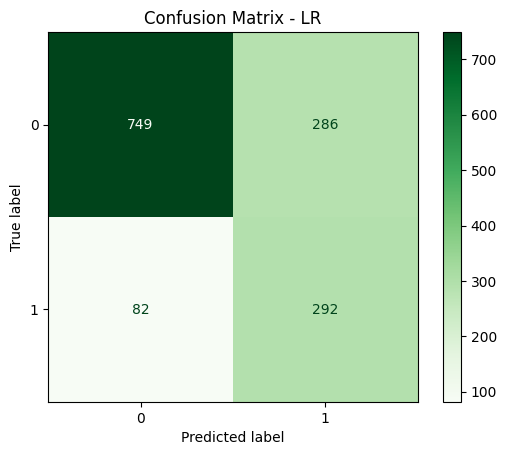

In [24]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - LR")
plt.show()

##SVM

In [25]:
svm_model = SVC(
    kernel="linear",
    class_weight="balanced",
    probability=True
)

svm_model.fit(X_train_scaled, y_train)

y_probs_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
y_pred_04 = (y_probs_svm >= 0.4).astype(int)

svm_accuracy = accuracy_score(y_test, y_pred_04)
svm_precision = precision_score(y_test, y_pred_04)
svm_recall = recall_score(y_test, y_pred_04)
svm_f1 = f1_score(y_test, y_pred_04)

print("SVM Results (threshold = 0.4)")
print("Accuracy :", svm_accuracy)
print("Precision:", svm_precision)
print("Recall   :", svm_recall)
print("F1 Score :", svm_f1)

SVM Results (threshold = 0.4)
Accuracy : 0.6941092973740242
Precision: 0.45752608047690013
Recall   : 0.820855614973262
F1 Score : 0.5875598086124402


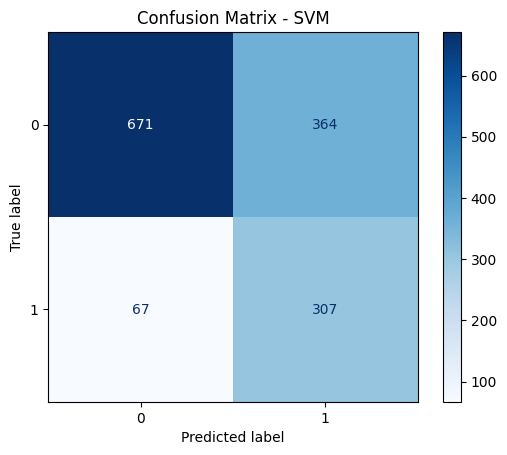

In [26]:
cm_svm = confusion_matrix(y_test, y_pred_04)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()

##XG Boost

In [27]:
scale = y_train.value_counts()[0] / y_train.value_counts()[1]

print("scale_pos_weight:", scale)

xgb_model = XGBClassifier(
    eval_metric="aucpr",
    scale_pos_weight=scale,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

y_probs_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

threshold = 0.4
y_pred_xgb = (y_probs_xgb >= threshold).astype(int)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

print("\nXGBoost Results (scale_pos_weight + threshold = 0.4)")
print("Accuracy :", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall   :", xgb_recall)
print("F1 Score :", xgb_f1)

scale_pos_weight: 2.768561872909699

XGBoost Results (scale_pos_weight + threshold = 0.4)
Accuracy : 0.7480482611781405
Precision: 0.5174953959484346
Recall   : 0.7513368983957219
F1 Score : 0.6128680479825518


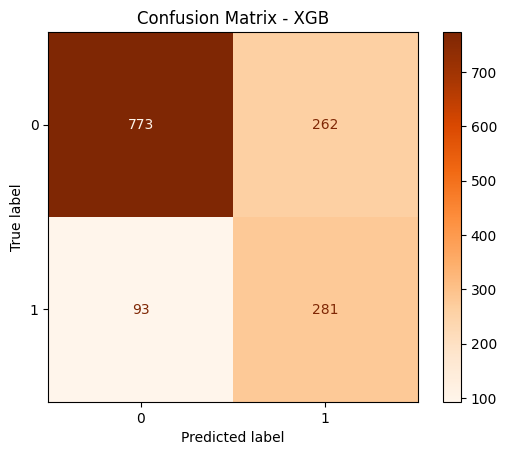

In [28]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - XGB")
plt.show()

#Model Comparison

In [29]:
model_performance = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "XGBoost"],
    "Accuracy": [lr_accuracy, svm_accuracy, xgb_accuracy],
    "Precision": [lr_precision, svm_precision, xgb_precision],
    "Recall": [lr_recall, svm_recall, xgb_recall],
    "F1 Score": [lr_f1, svm_f1, xgb_f1]
})

model_performance


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.738822,0.505190,0.780749,0.613445
1,SVM,0.694109,0.457526,0.820856,0.587560
2,XGBoost,0.748048,0.517495,0.751337,0.612868
